## PACKAGES

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


## Lecture et Visualisation des données

In [18]:
df.head(1)

,Date,Sales
0,2021-01-31,469.544719


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


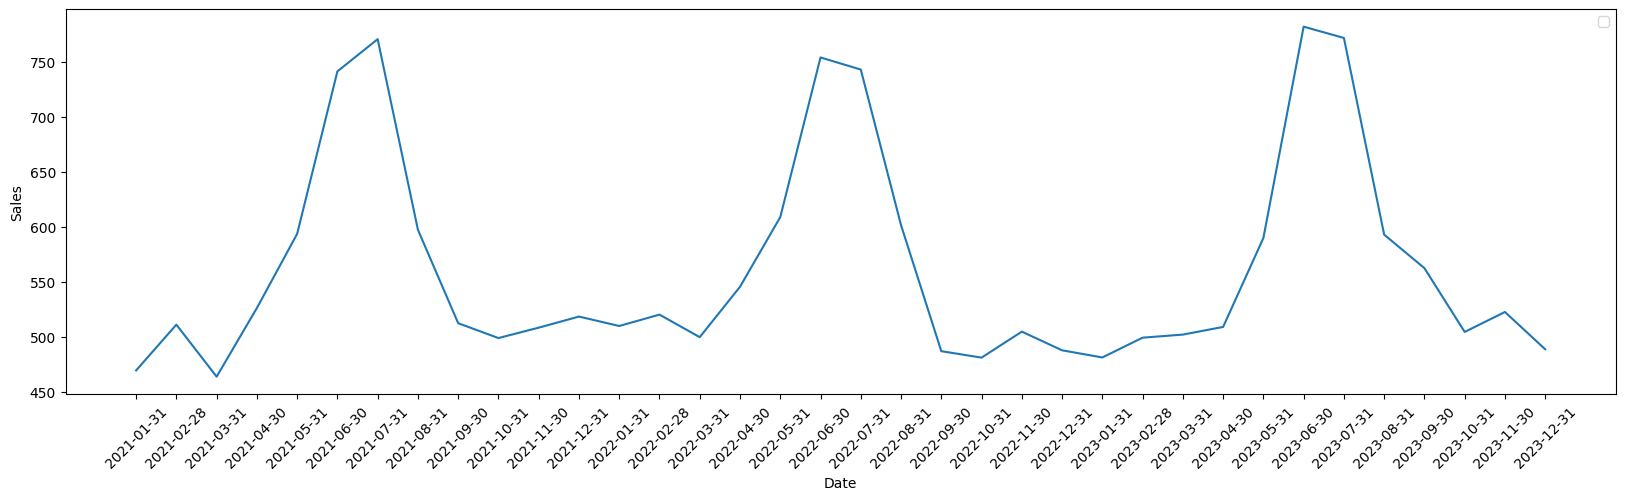

In [19]:
# 1ere étape: Visualiser les données
# Charger les données
df = pd.read_csv('sales_data_boulon.csv')

# Afficher les ventes des produits
plt.figure(figsize=[20, 5])
plt.plot(df['Date'], df['Sales'])
plt.xlabel('Date',)
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


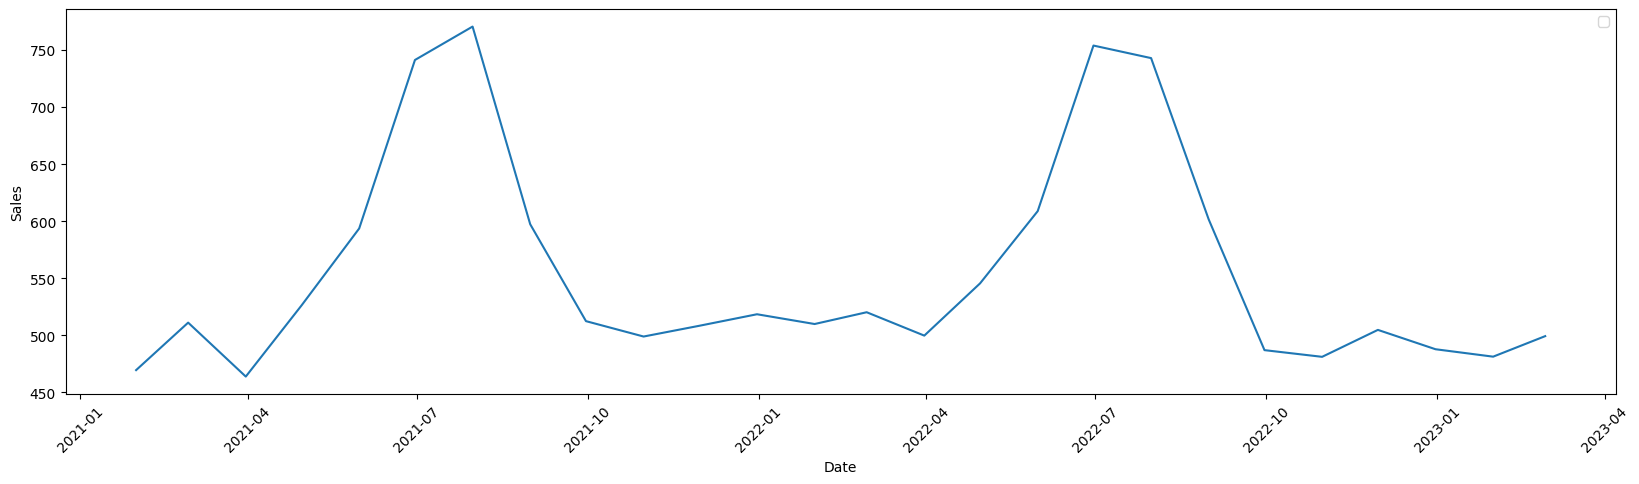

In [26]:
df_short = df[df['Date']<="2023-03-01"]
# Afficher les ventes des produits
plt.figure(figsize=[20, 5])
plt.plot(df_short['Date'], df_short['Sales'])
plt.xlabel('Date',)
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Nous pouvons remarquer une saisonnalité dans les ventes de t-shirts, avec une diminution des ventes pendant l'été et une période de ventes plus soutenues d'octobre à juin.

## Création d'un modèle simple

In [20]:

# 2e étape: Faire un modèle de prévision des ventes
# Pour cet exemple, nous allons prévoir les ventes de T-Shirt
# Créer des caractéristiques à partir des dates
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
train_data = df[df['Date'] < '2023-01-01']
test_data = df[df['Date'] >= '2023-01-01']

# Diviser les données en ensembles d'entraînement et de test
X_train = train_data[['Month', 'Year']]
y_train = train_data['Sales']

X_test = train_data[['Month', 'Year']]
y_test = train_data['Sales']
# Créer et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)



# Prévoir les ventes sur l'ensemble de test
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)




In [21]:
# 3e étape: Afficher les résultats
# Calculer et afficher la précision (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error test: {mae}')
mae_train = mean_absolute_error(y_train, y_pred_train)
print(f'Mean Absolute Error Train: {mae_train}')




Mean Absolute Error test: 77.05572438870051
Mean Absolute Error Train: 77.05572438870051


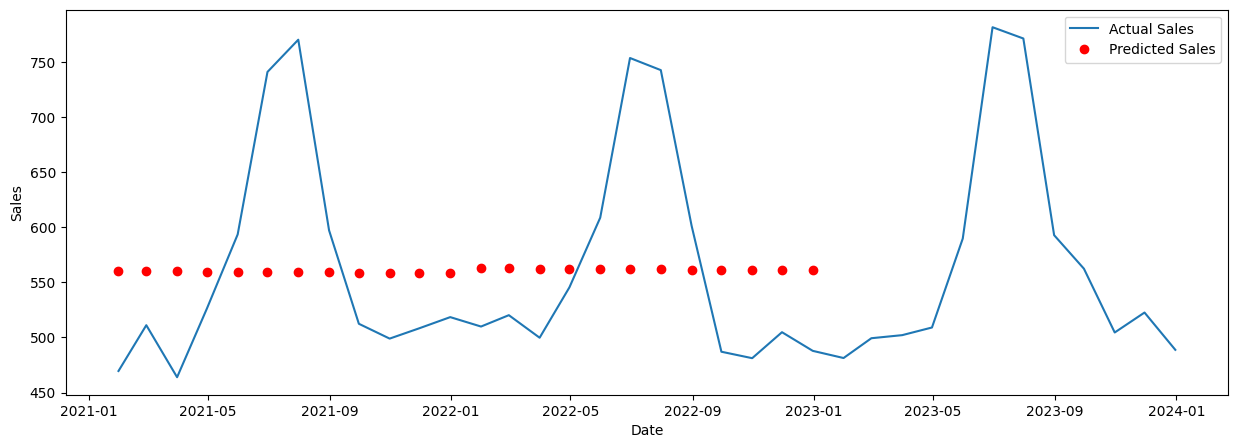

In [22]:
# Afficher les prédictions pour l'avenir
plt.figure(figsize=[15, 5])
plt.plot(df['Date'], df['Sales'], label='Actual Sales')
plt.plot(df['Date'].iloc[X_test.index], y_pred, 'ro', label='Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

## Création d'un modèle plus complexe
Nous allons utiliser un modèle de type SARIMA car nous avons pu observer une saisonnalité dans la vente de t-shirt

In [23]:
# Split les données en ensembles d'entraînement et de test basés sur la chronologie
train_data = df[df['Date'] < '2023-01-01']
test_data = df[(df['Date'] >= '2023-01-01') & (df['Date'] < '2023-06-30')]
valid_data = df[(df['Date'] >= '2023-06-30')]

y_train = train_data['Sales']
y_test = test_data['Sales']
y_valid = valid_data['Sales']

# Créer un modèle SARIMA
# Les hyperparamètres (p,d,q) et (P,D,Q,s) doivent être ajustés en fonction de vos données.
# Ici, nous utilisons des valeurs génériques et supposons une saisonnalité annuelle avec s=12.
model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
fit_model = model.fit(disp=False)

# Prévoir les ventes sur l'ensemble de train/test
y_pred_train = fit_model.predict(start=0, end=len(y_train) - 1, dynamic=False)

y_pred = fit_model.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, dynamic=False)
y_pred_valid = fit_model.predict(start=len(y_train)+ len(y_test), end=len(y_train) + len(y_test) + len(y_valid) - 1, dynamic=False)

# Calculer et afficher la précision (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
mae_train = mean_absolute_error(y_train, y_pred_train)
print(f'Mean Absolute Error train : {mae_train}')



c:\Users\benja\Documents\projets\02_demonstrateur\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Mean Absolute Error: 13.938283261112508
Mean Absolute Error train : 64.40129668094075


c:\Users\benja\Documents\projets\02_demonstrateur\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [28]:
y_pred_train[0] = 400

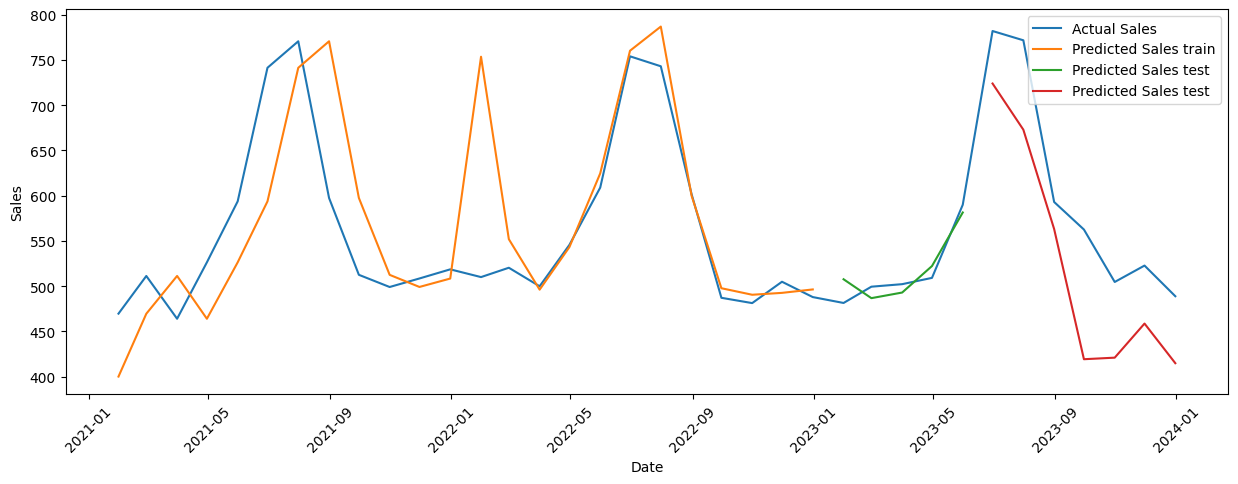

In [29]:
# Afficher les prédictions pour l'avenir
plt.figure(figsize=[15, 5])
plt.plot(df['Date'], df['Sales'], label='Actual Sales')
plt.plot(train_data['Date'], y_pred_train, label='Predicted Sales train')
plt.plot(test_data['Date'], y_pred, label='Predicted Sales test')
plt.plot(valid_data['Date'], y_pred_valid, label='Predicted Sales test')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45) 
plt.legend()
plt.show()

## Ecriture de la prédiction

In [27]:
train_data["prediction"] = y_pred_train
test_data["prediction"] = y_pred
valid_data["prediction"] = y_pred_valid


C:\Users\benja\AppData\Local\Temp\ipykernel_50964\3987209036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["prediction"] = y_pred_train
C:\Users\benja\AppData\Local\Temp\ipykernel_50964\3987209036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["prediction"] = y_pred
C:\Users\benja\AppData\Local\Temp\ipykernel_50964\3987209036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [28]:
data_pred = pd.concat([train_data,test_data,valid_data])
data_pred.to_csv("sales_data_prevision.csv",encoding='utf-8', index=False)